<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 20px;
    font-weight: bold;
    text-align: center;">
    RNN, LSTM and GRU Binary Classification
</div>



In [39]:
pip install tensorflow_datasets

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
-----------------------------------------------------------------------------------------------------------------------------------------
</br>
Importing all the necessary libraries
</div>


In [40]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfdb
from tensorflow.keras.models import Sequential

In [41]:
from keras.layers import Dense, Embedding, SimpleRNN, Bidirectional, LSTM, GRU

In [42]:
imdb, info = tfdb.load('imdb_reviews', with_info=True, as_supervised=True)

In [43]:
info

tfds.core.DatasetInfo(
    name='imdb_reviews',
    full_name='imdb_reviews/plain_text/1.0.0',
    description="""
    Large Movie Review Dataset. This is a dataset for binary sentiment
    classification containing substantially more data than previous benchmark
    datasets. We provide a set of 25,000 highly polar movie reviews for training,
    and 25,000 for testing. There is additional unlabeled data for use as well.
    """,
    config_description="""
    Plain text
    """,
    homepage='http://ai.stanford.edu/~amaas/data/sentiment/',
    data_dir='/root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0',
    file_format=tfrecord,
    download_size=80.23 MiB,
    dataset_size=129.83 MiB,
    features=FeaturesDict({
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
        'text': Text(shape=(), dtype=string),
    }),
    supervised_keys=('text', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=25000, num_shards=1>,
    

In [44]:
imdb

{'train': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'test': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 'unsupervised': <_PrefetchDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>}

In [45]:
train_data, test_data = imdb['train'], imdb['test']

In [46]:
training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s, l in train_data:
    training_sentences.append(str(s.numpy()))
    training_labels.append(l.numpy())

for s, l in test_data:
    testing_sentences.append(str(s.numpy()))
    testing_labels.append(l.numpy())


In [47]:
print(training_sentences[100])
print(training_labels[100])

b"I enjoyed this movie,and after watching it,it made me wonder just how many 'Caitlin Rose's' exist in the world.How many other girls have been subjected to this sort of sexual abuse,and torment by classmates and have been too frightened to open their mouth about it? Just how threatening and cruel can teenagers be towards one another,because as this film demonstrates,who's right is not foremost important,its who is popular,and feared which manipulates the minds of youths,and influences them to allow this sort of immorality to happen.Tiffani Amber Thiessen gives a powerful performance as the rape victim,and Brian Austin Green is convincing as the guy torn between the girl he thought he loved,and his best friend.This is the kind of film that doesn't get the exposure it deserves.Remarkable,and brilliant,too good to be just a film made for TV."
1


In [48]:

len(training_sentences), len(testing_sentences)

(25000, 25000)

In [49]:
training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
-----------------------------------------------------------------------------------------------------------------------------------------
</div>


<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
    Text Preprocessing
</div>


In [50]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [51]:
tokenizer = Tokenizer(num_words=10000)

In [52]:
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

word_index

{'the': 1,
 'and': 2,
 'a': 3,
 'of': 4,
 'to': 5,
 'is': 6,
 'br': 7,
 'in': 8,
 'it': 9,
 'i': 10,
 'this': 11,
 'that': 12,
 'was': 13,
 'as': 14,
 'for': 15,
 'with': 16,
 'movie': 17,
 'but': 18,
 'film': 19,
 "'s": 20,
 'on': 21,
 'you': 22,
 'not': 23,
 'are': 24,
 'his': 25,
 'he': 26,
 'have': 27,
 'be': 28,
 'one': 29,
 'all': 30,
 'at': 31,
 'by': 32,
 'they': 33,
 'an': 34,
 'who': 35,
 'so': 36,
 'from': 37,
 'like': 38,
 'her': 39,
 "'t": 40,
 'or': 41,
 'just': 42,
 'there': 43,
 'about': 44,
 'out': 45,
 "'": 46,
 'has': 47,
 'if': 48,
 'some': 49,
 'what': 50,
 'good': 51,
 'more': 52,
 'very': 53,
 'when': 54,
 'she': 55,
 'up': 56,
 'can': 57,
 'b': 58,
 'time': 59,
 'no': 60,
 'even': 61,
 'my': 62,
 'would': 63,
 'which': 64,
 'story': 65,
 'only': 66,
 'really': 67,
 'see': 68,
 'their': 69,
 'had': 70,
 'were': 71,
 'me': 72,
 'well': 73,
 'we': 74,
 'than': 75,
 'much': 76,
 'been': 77,
 'get': 78,
 'bad': 79,
 'will': 80,
 'people': 81,
 'do': 82,
 'also': 83,


In [53]:
sequences = tokenizer.texts_to_sequences(training_sentences)

padded = pad_sequences(
    sequences,
    maxlen=500,
    truncating='post',
    padding='pre'
)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)

testing_padded = pad_sequences(
    testing_sequences,
    maxlen=500,
    truncating='post',
    padding='pre'
)



In [54]:
padded.shape, testing_padded.shape

((25000, 500), (25000, 500))

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
-----------------------------------------------------------------------------------------------------------------------------------------
</br>
Using Simple RNN
</div>


In [55]:
model_rnn = Sequential([
    Embedding(10000, 50, input_length=500),
    SimpleRNN(32),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [56]:
model_rnn.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [57]:
model_rnn.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [58]:
history_rnn = model_rnn.fit(
    padded,
    training_labels,
    epochs=10,
    validation_data=(testing_padded, testing_labels)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 65ms/step - accuracy: 0.5540 - loss: 0.6718 - val_accuracy: 0.7195 - val_loss: 0.5487
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 63ms/step - accuracy: 0.7803 - loss: 0.4750 - val_accuracy: 0.7967 - val_loss: 0.4769
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 65ms/step - accuracy: 0.8934 - loss: 0.2641 - val_accuracy: 0.7668 - val_loss: 0.5233
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 81s 63ms/step - accuracy: 0.9665 - loss: 0.1046 - val_accuracy: 0.7623 - val_loss: 0.6632
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.9850 - loss: 0.0485 - val_accuracy: 0.7898 - val_loss: 0.7693
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 90s 73ms/step - accuracy: 0.9930 - loss: 0.0251 - val_accuracy: 0.7864 - val_loss: 0.8919
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 65ms/step - accuracy: 0.9843 - loss: 0.0436 - val_accuracy: 0.7192 - val_loss: 1.1375
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 63ms/step - accuracy: 0.9952 - loss: 0.0148 - 

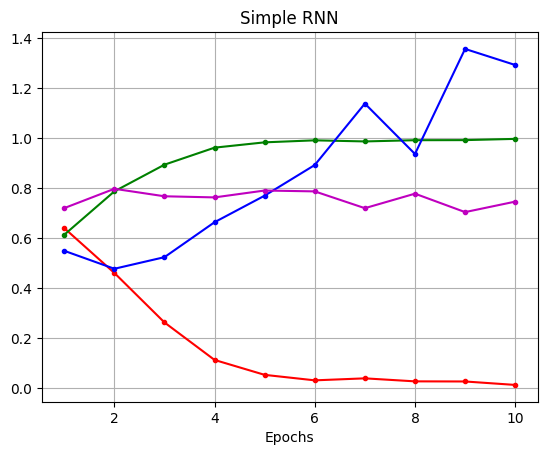

In [59]:
import matplotlib.pyplot as plt
plt.title('Simple RNN')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_rnn.history['loss'], color='r', label='Loss', marker='.')
plt.plot(range(1,11), history_rnn.history['accuracy'], color='g', label='Accuracy', marker='.')
plt.plot(range(1,11), history_rnn.history['val_loss'], color='b', label='Val_loss', marker='.')
plt.plot(range(1,11), history_rnn.history['val_accuracy'], color='m', label='Val_accuracy', marker='.')

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
-----------------------------------------------------------------------------------------------------------------------------------------
</br>
Using Bidirection RNN
</div>


In [60]:
model_bidirectional_rnn = Sequential([
    Embedding(10000, 50, input_length=500),
    Bidirectional(LSTM(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [61]:
model_bidirectional_rnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [62]:
model_bidirectional_rnn.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [63]:
history_lstm = model_bidirectional_rnn.fit(
    padded,
    training_labels,
    epochs=10,
    validation_data=(testing_padded, testing_labels)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.7126 - loss: 0.5262 - val_accuracy: 0.7358 - val_loss: 0.5384
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 46ms/step - accuracy: 0.8810 - loss: 0.3014 - val_accuracy: 0.8722 - val_loss: 0.3137
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 45s 58ms/step - accuracy: 0.9292 - loss: 0.1936 - val_accuracy: 0.8747 - val_loss: 0.3157
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 46ms/step - accuracy: 0.9510 - loss: 0.1428 - val_accuracy: 0.8719 - val_loss: 0.3631
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 46ms/step - accuracy: 0.9607 - loss: 0.1141 - val_accuracy: 0.8688 - val_loss: 0.3895
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9678 - loss: 0.0895 - val_accuracy: 0.8610 - val_loss: 0.4306
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 46ms/step - accuracy: 0.9816 - loss: 0.0603 - val_accuracy: 0.8546 - val_loss: 0.4868
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 48ms/step - accuracy: 0.9825 - loss: 0.0550 - 

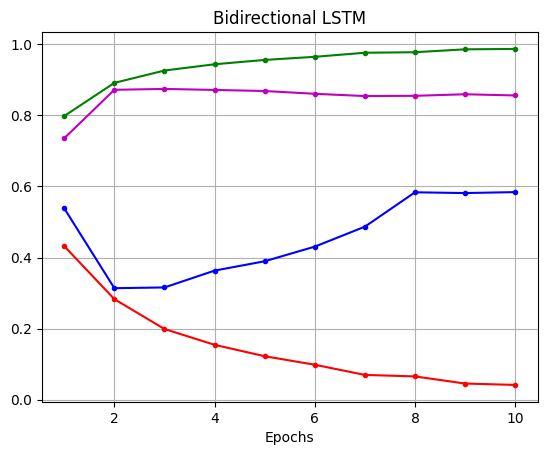

In [64]:
import matplotlib.pyplot as plt
plt.title('Bidirectional LSTM')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_lstm.history['loss'], color='r', label='Loss', marker='.')
plt.plot(range(1,11), history_lstm.history['accuracy'], color='g', label='Accuracy', marker='.')
plt.plot(range(1,11), history_lstm.history['val_loss'], color='b', label='Val_loss', marker='.')
plt.plot(range(1,11), history_lstm.history['val_accuracy'], color='m', label='Val_accuracy', marker='.')

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
-----------------------------------------------------------------------------------------------------------------------------------------
</br>
Using GRU
</div>


In [65]:
model_gru = Sequential([
    Embedding(10000, 50, input_length=500),
    Bidirectional(GRU(32)),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [66]:
model_gru.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [67]:
model_gru.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [68]:
history_model_gru = model_gru.fit(
    padded,
    training_labels,
    epochs=10,
    validation_data=(testing_padded, testing_labels)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 46ms/step - accuracy: 0.6794 - loss: 0.5584 - val_accuracy: 0.8614 - val_loss: 0.3245
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.8986 - loss: 0.2576 - val_accuracy: 0.8773 - val_loss: 0.3156
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 46ms/step - accuracy: 0.9375 - loss: 0.1729 - val_accuracy: 0.8779 - val_loss: 0.3107
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 45ms/step - accuracy: 0.9570 - loss: 0.1217 - val_accuracy: 0.8647 - val_loss: 0.3388
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9707 - loss: 0.0880 - val_accuracy: 0.8691 - val_loss: 0.3875
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 45ms/step - accuracy: 0.9838 - loss: 0.0511 - val_accuracy: 0.8640 - val_loss: 0.4367
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 46s 51ms/step - accuracy: 0.9904 - loss: 0.0314 - val_accuracy: 0.8622 - val_loss: 0.5082
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 45ms/step - accuracy: 0.9946 - loss: 0.0200 - 

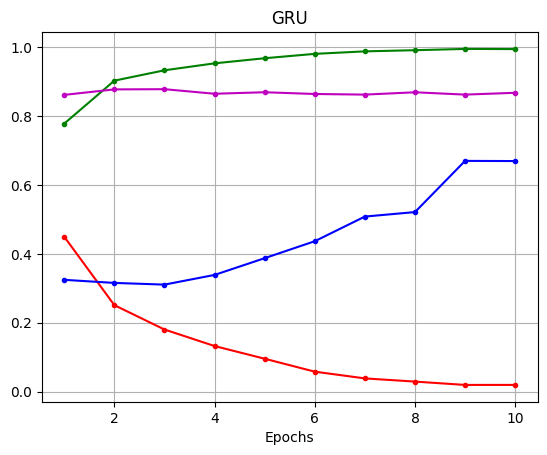

In [69]:
import matplotlib.pyplot as plt
plt.title('GRU')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_model_gru.history['loss'], color='r', label='Loss', marker='.')
plt.plot(range(1,11), history_model_gru.history['accuracy'], color='g', label='Accuracy', marker='.')
plt.plot(range(1,11), history_model_gru.history['val_loss'], color='b', label='Val_loss', marker='.')
plt.plot(range(1,11), history_model_gru.history['val_accuracy'], color='m', label='Val_accuracy', marker='.')

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
-----------------------------------------------------------------------------------------------------------------------------------------
</br>
Plotting all the graphs
</div>


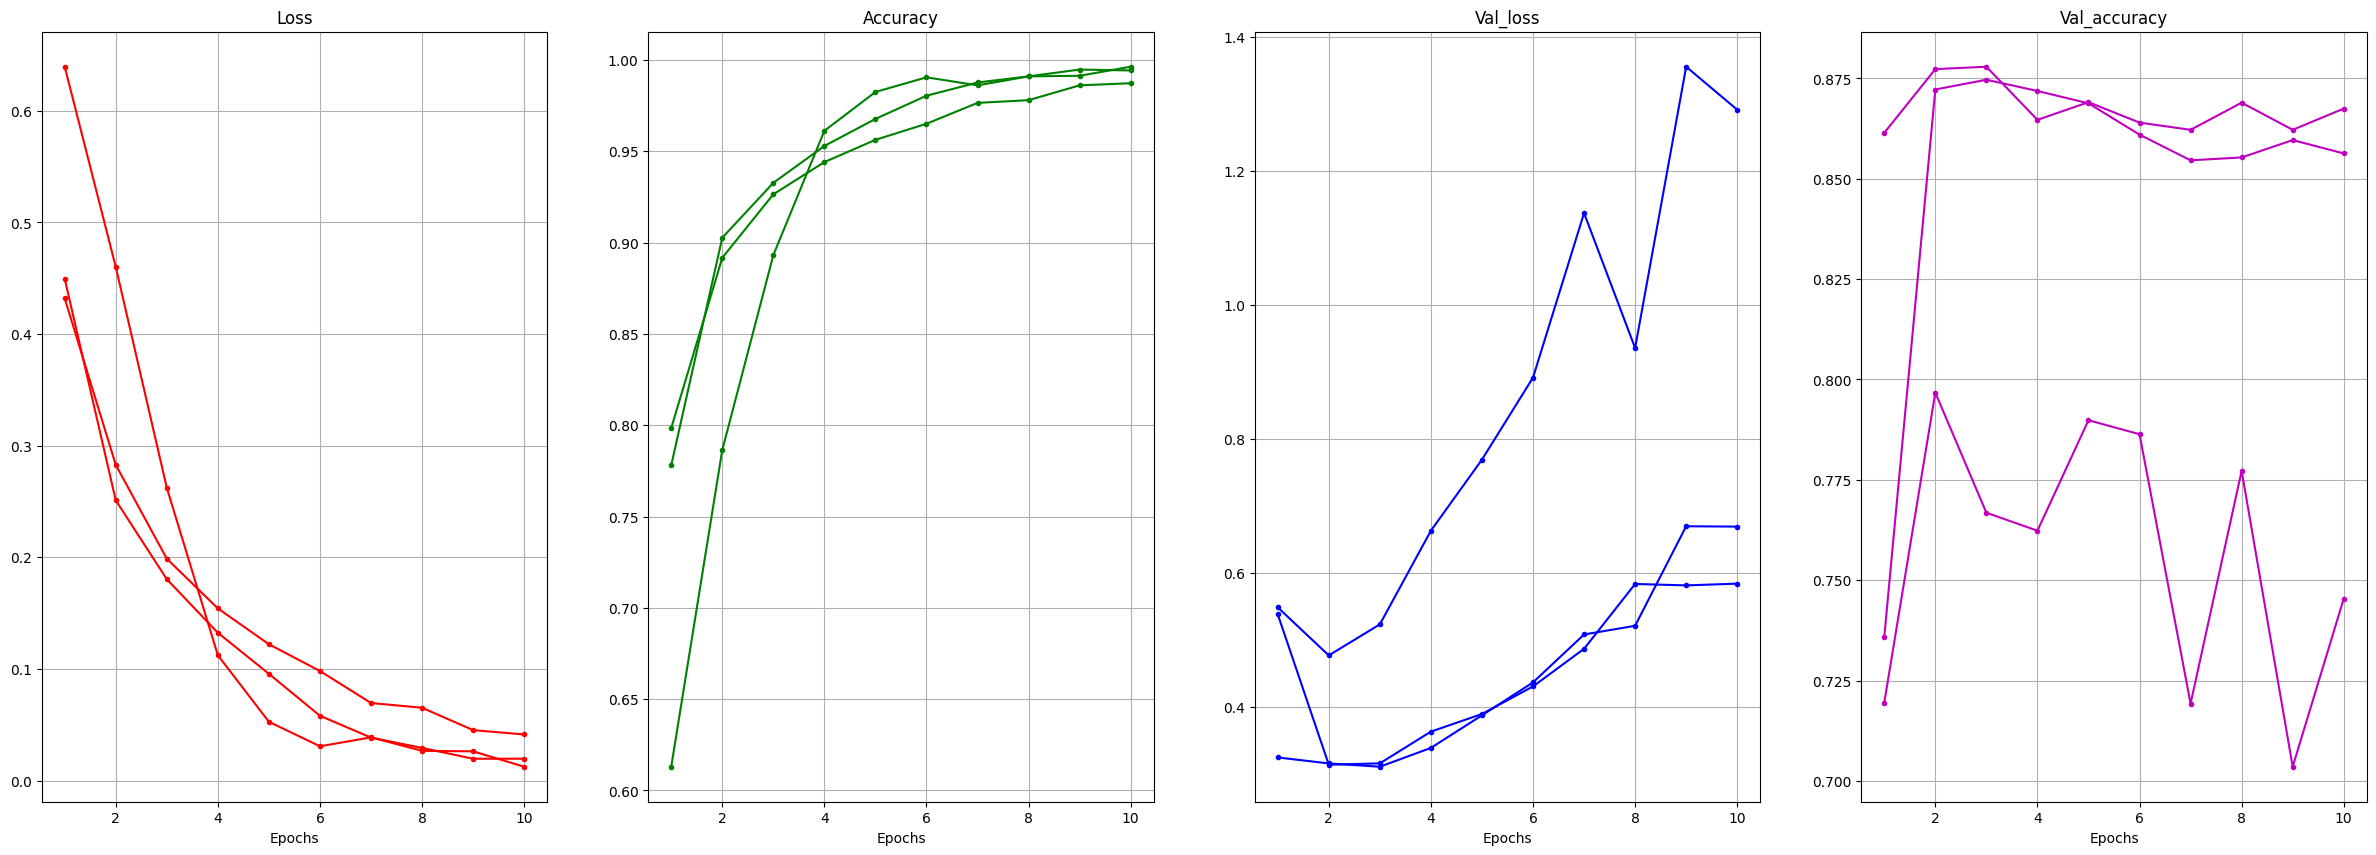

In [74]:
plt.figure(figsize=(30,10))
plt.subplot(1,4,1)
plt.title('Loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_rnn.history['loss'], color='r', label='Loss', marker='.')
plt.plot(range(1,11), history_lstm.history['loss'], color='r', label='Loss', marker='.')
plt.plot(range(1,11), history_model_gru.history['loss'], color='r', label='Loss', marker='.')

plt.subplot(1,4,2)
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_rnn.history['accuracy'], color='g', label='Accuracy', marker='.')
plt.plot(range(1,11), history_lstm.history['accuracy'], color='g', label='Accuracy', marker='.')
plt.plot(range(1,11), history_model_gru.history['accuracy'], color='g', label='Accuracy', marker='.')

plt.subplot(1,4,3)
plt.title('Val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_rnn.history['val_loss'], color='b', label='Val_loss', marker='.')
plt.plot(range(1,11), history_lstm.history['val_loss'], color='b', label='Val_loss', marker='.')
plt.plot(range(1,11), history_model_gru.history['val_loss'], color='b', label='Val_loss', marker='.')

plt.subplot(1,4,4)
plt.title('Val_accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.plot(range(1,11), history_rnn.history['val_accuracy'], color='m', label='Val_accuracy', marker='.')
plt.plot(range(1,11), history_lstm.history['val_accuracy'], color='m', label='Val_accuracy', marker='.')
plt.plot(range(1,11), history_model_gru.history['val_accuracy'], color='m', label='Val_accuracy', marker='.')

plt.show()

<div style="
    background: linear-gradient(90deg,rgb(251, 255, 10), #ff758c, #ff4d6d);
    -webkit-background-clip: text;
    -webkit-text-fill-color: transparent;
    font-size: 17px;
    font-weight: bold;
    text-align: center;">
-----------------------------------------------------------------------------------------------------------------------------------------
</br>
Prediction Model
</div>


In [81]:
def predict(model, text):
    seq = tokenizer.texts_to_sequences([text])

    pad = pad_sequences(
        seq,
        maxlen=500,
        truncating='post',
        padding='pre'
    )

    results = model.predict(pad, verbose=0)
    percent_pos = results[0][0]
    if round(percent_pos) == 0:
        return ((1 - percent_pos), 'Negative')
    return (percent_pos, 'Positive')

In [82]:
new1 = 'This was the worst movie. Please do not watch it. Waste of money and time'
new2 = 'A must watch movie. I lvoed to watch it. It was just amazing!'

In [86]:
predict(model_rnn, new1), predict(model_rnn, new2)

((0.9988876, 'Positive'), (0.9999664, 'Positive'))

In [84]:
predict(model_bidirectional_rnn, new1), predict(model_bidirectional_rnn, new2)

((0.9960254337638617, 'Negative'), (0.9985154, 'Positive'))

In [85]:
predict(model_gru, new1), predict(model_gru, new2)

((0.9995403899811208, 'Negative'), (0.9977857, 'Positive'))